# MMNMBD HomeWork 2 - Palmieri Anthony 2038503

# Exercise 2

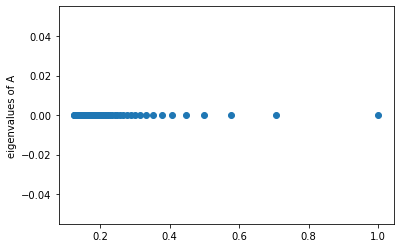

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

D = np.diag([1/np.sqrt(j) for j in range(1,65)])
UD = np.diag([1/np.sqrt(j) for j in range(1,64)],1)
A = D+UD

# clearly the eigenvalues of A are just the diagonal elements, in particular they're all real numbers
eigenvalues = np.linalg.eigvals(A)
# rightmost eigenvalue
lmbd = max(eigenvalues)

# let's plot the eigenvalues of A
plt.scatter(eigenvalues, np.zeros(64))
plt.ylabel('eigenvalues of A')
plt.show()

## Arnoldi Algorithm

In [2]:
# Arnoldi algorithm
# notice that we used eps as a tolerance value to check H[j+1,j]=0 at each iteration
# That's because checking H[j+1,j]=0 is numerically unstable

def Arnoldi_iter(A,x,m):
  eps = 1e-13  
  Q = np.zeros((A.shape[0], A.shape[1]+1))
  H = np.zeros((A.shape[0]+1, A.shape[1]))
  Q[:, 0] = x/la.norm(x)
  for j in range(m):    
    r = np.dot(A, Q[:, j])
    for i in range(j+1):
      H[i, j]= np.dot(Q[:, i].T, np.dot(A, Q[:, j]))      
      r = r-H[i,j]*Q[:,i]    
    beta = la.norm(r)    
    if beta<eps:
      return Q[:,:j], H[:j,:j]
    else:
      H[j+1,j] = beta
      Q[:, j+1]=r/H[j+1,j]      
  return Q[:,:m+1], H[:m+1,:m]

let's apply Arnoldi iteration on matrix A with starting vector x0, and let's plot the Ritz values.

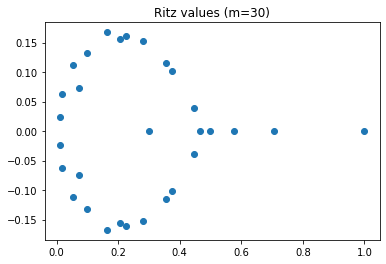

In [4]:
from random import randint
import matplotlib.pyplot as plt
from IPython.display import clear_output
    
# Randomly generated starting vector
np.random.seed(42)
x0=np.random.randn(64)

# dictionary we'll use to store Ritz values for each m=1, ..., 30
n=30
ritz_values={}
for m in range(1,n+1):
  Q_mplus1, H_m_tilde = Arnoldi_iter(A,x0,m)
  if H_m_tilde.shape==(m+1,m):
    H_m = H_m_tilde[:m,:m]
  else:
    H_m=H_m_tilde
  # compute Ritz values for H_m and save them in the dictionary
  ritz_values[m]= np.linalg.eigvals(H_m)

# let's plot the Ritz values
for key in ritz_values.keys():
  x,y=[],[] # we'll use these variables for the scatter plots
  clear_output(wait=True) 
  for elem in ritz_values[key]:
      x.append(elem.real)
      y.append(elem.imag)  
  plt.scatter(x, y)
  plt.title(f'Ritz values (m={key})')
  plt.show()

let's have a look at the convergence rate to the rightmost eigenvalue of A

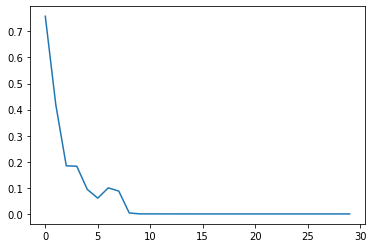

In [5]:
x = range(len(ritz_values.keys()))
y = [np.abs(max(ritz_values[m])-lmbd) for m in ritz_values.keys()]
plt.plot(x,y)

The convergence is quite fast. It takes less than 10 iterations for the error to go to zero.

# Exercise 3

Eigenvalues: [1.         0.70710678 0.57735027 0.5        0.4472136  0.40824829
 0.37796447 0.35355339 0.33333333 0.31622777 0.30151134 0.28867513
 0.2773501  0.26726124 0.25819889 0.25       0.24253563 0.23570226
 0.22941573 0.2236068  0.21821789 0.21320072 0.20851441 0.20412415
 0.2        0.19611614 0.19245009 0.18898224 0.18569534 0.18257419
 0.1796053  0.1767767  0.17407766 0.17149859 0.16903085 0.16666667
 0.16439899 0.16222142 0.16012815 0.15811388 0.15617376 0.15430335
 0.15249857 0.15075567 0.1490712  0.14744196 0.14586499 0.14433757
 0.14285714 0.14142136 0.14002801 0.13867505 0.13736056 0.13608276
 0.13483997 0.13363062 0.13245324 0.13130643 0.13018891 0.12909944
 0.12803688 0.12700013 0.12598816 0.125     ]
Ritz values: [1.        +0.j         0.70710678+0.j         0.57735035+0.j
 0.49968689+0.j         0.46559423+0.j         0.44714411+0.0396245j
 0.44714411-0.0396245j  0.37574012+0.10226293j 0.37574012-0.10226293j
 0.35396757+0.11506525j 0.35396757-0.11506525j 0.2806165 

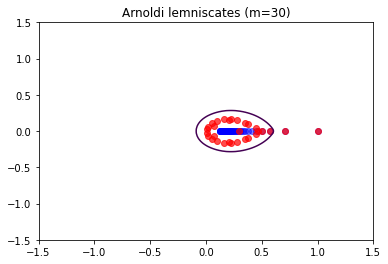

In [6]:
# In the following we define the lemniscates() function, which given a matrix A, a starting vector x, and a number m
# plots Arnoldi lemniscates of the characteristic polynomial of the Hessenberg matrix Hm obtained after m Arnoldi iterations
# It also computes the eigenvalues of A and the Ritz values of Hm

def lemniscates(A, x, m, lower_x=-1.5, upper_x=1.5, lower_y=-1.5, upper_y=1.5):
  Q_mplus1, H_m_tilde = Arnoldi_iter(A,x,m)

  if H_m_tilde.shape==(m+1,m):
    H_m = H_m_tilde[:m,:m]
  else:
    H_m=H_m_tilde
 
  # characteristic polynomial of Hm
  char_poly = np.poly(H_m)
  # which we recall being the m-deegre polynomial minimizing ||p_m(A)||
  min_m_poly = char_poly
  # constant coefficient defining the level of the Arnoldi lemniscate  
  coeff = la.norm(np.dot(np.polyval(min_m_poly, A),x))/la.norm(x)
  
  # plotting the lemniscate
  x=np.linspace(lower_x,upper_x,400)
  y=np.linspace(lower_y,upper_y,400)
  X, Y = np.meshgrid(x, y)  
  Z = np.abs(np.polyval(min_m_poly, X + 1j*Y))
  plt.contour(X, Y, Z, levels=[coeff,], alpha=1)
  plt.title(f'Arnoldi lemniscates (m={m})')
  
  # plotting the eigenvalues of A
  x,y=[],[]
  eig_vls = la.eigvals(A)
  print(f'Eigenvalues: {eig_vls}')
  for elem in eig_vls:
      x.append(elem.real)
      y.append(elem.imag)  
  plt.scatter(x, y, c='blue', alpha=0.5)

  # plotting the Ritz values of Hm
  x,y=[],[]
  ritz_vls = la.eigvals(H_m)
  print(f'Ritz values: {ritz_vls}')
  for elem in ritz_vls:
      x.append(elem.real)
      y.append(elem.imag)  
  plt.scatter(x, y, c='red', alpha=0.7)

  plt.show()
  return 

# let's have a look at the lemniscates we obtain after 30 Arnoldi iterations
lemniscates(A,x0,30)

### Exercise 3 - point (b)

Eigenvalues: [ 44.52353187+97.12079227j  44.52353187-97.12079227j
 -98.20846828+40.7955485j  -98.20846828-40.7955485j
  88.15784208+55.45686575j  88.15784208-55.45686575j
  73.37559001+64.56498838j  73.37559001-64.56498838j
 -99.10516072 +0.j          12.31155901+93.43614122j
  12.31155901-93.43614122j   6.4466401 +93.66952065j
   6.4466401 -93.66952065j  94.93507847 +0.j
  29.18455802+86.3008809j   29.18455802-86.3008809j
  86.08367639+35.56476141j  86.08367639-35.56476141j
 -89.51576623 +0.j         -64.06573284+62.65857574j
 -64.06573284-62.65857574j -56.62788684+66.45868937j
 -56.62788684-66.45868937j -43.02556252+75.79505143j
 -43.02556252-75.79505143j -24.35717724+80.26988374j
 -24.35717724-80.26988374j  80.77284341+26.00128673j
  80.77284341-26.00128673j  52.17464438+64.01588673j
  52.17464438-64.01588673j -85.36353558 +6.67244907j
 -85.36353558 -6.67244907j  79.94679742+12.3916355j
  79.94679742-12.3916355j  -44.16090856+67.13189636j
 -44.16090856-67.13189636j  13.05846275+78.1

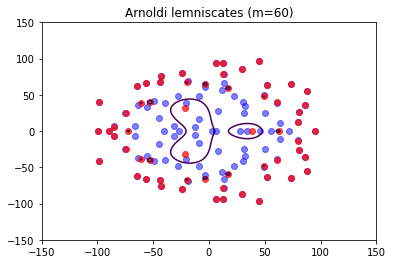

Eigenvalues: [ 44.62957573+96.95247339j  44.62957573-96.95247339j
 -98.20108459+40.80322848j -98.20108459-40.80322848j
  88.23140204+55.43475561j  88.23140204-55.43475561j
  73.3038698 +64.57737668j  73.3038698 -64.57737668j
  94.9671076  +0.j         -99.9736246  +0.j
  86.03510479+35.77105718j  86.03510479-35.77105718j
  12.15364984+93.14323591j  12.15364984-93.14323591j
   6.83240089+93.73405753j   6.83240089-93.73405753j
  29.10797074+86.4362383j   29.10797074-86.4362383j
 -64.0308745 +62.48111978j -64.0308745 -62.48111978j
 -87.70642805 +0.j         -56.65142691+66.71227018j
 -56.65142691-66.71227018j -42.91568733+75.87574277j
 -42.91568733-75.87574277j -24.39670672+80.357678j
 -24.39670672-80.357678j   -85.38187309 +6.4602415j
 -85.38187309 -6.4602415j   81.18806274+25.91589468j
  81.18806274-25.91589468j  52.34128742+63.95940251j
  52.34128742-63.95940251j  79.91995277+12.48740322j
  79.91995277-12.48740322j -43.89417268+66.93547779j
 -43.89417268-66.93547779j  13.14554728+78.12

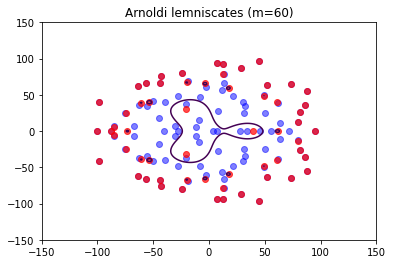

In [7]:
np.random.seed(42)
A = np.random.normal(0,10, (100,100))
x0 = np.random.normal(0,10, 100)
# let's have a look at the lemniscates we obtain after 60 Arnoldi iterations
lemniscates(A,x0,60, lower_x=-150, upper_x=150, lower_y=-150, upper_y=150) 

B = A.copy()
B[1,1]=1.5
# let's have a look at the lemniscates we obtain after 60 Arnoldi iterations
lemniscates(B,x0,60, lower_x=-150, upper_x=150, lower_y=-150, upper_y=150) 

We observe that even altering the matrix the situation hasn't changed much. The configuration of eigenvalues and Ritz values seems pretty much the same, even though the Arnoldi lemniscates appear to be slightly different.

let's analyse the convergence to the
eigenvalue of B with the largest real part.

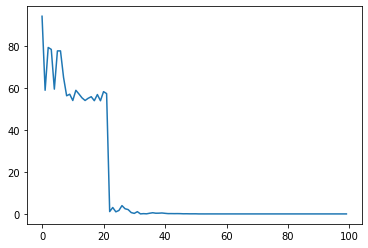

In [8]:
# dictionary we'll use to store Ritz values for each m=1, ..., 100
n=100
ritz_values={}
for m in range(1,n+1):
  Q_mplus1, H_m_tilde = Arnoldi_iter(B,x0,m)
  if H_m_tilde.shape==(m+1,m):
    H_m = H_m_tilde[:m,:m]
  else:
    H_m=H_m_tilde
  # compute Ritz values for H_m and save them in the dictionary
  ritz_values[m]= np.linalg.eigvals(H_m)

B_eigs = la.eigvals(B)
# eigenvalue of B with largest real part
largest_real_part = np.max([eig.real for eig in B_eigs])
lambd = [eig for eig in B_eigs if eig.real==largest_real_part][0]

x = range(len(ritz_values.keys()))
y = [np.abs(max(ritz_values[m])-lambd) for m in ritz_values.keys()]
plt.plot(x,y)

In this case the convergence is not so smooth, even though it's still quite fast.

# Exercise 4

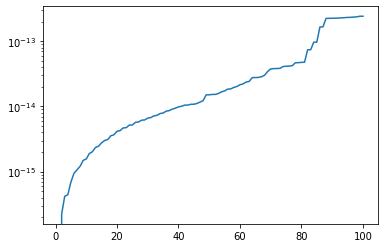

In [9]:
np.random.seed(42)
B = np.random.normal(0,1,(100,100))
x0 = np.random.normal(0,1,100)
A = B+B.T

norms = {}
for k in range(1,101):
  Q_kplus1, H_k_tilde = Arnoldi_iter(A, x0, k)

  if Q_kplus1.shape==(A.shape[0],k+1):
    Q_k = Q_kplus1[:,:k]
  else:
    Q_k = Q_kplus1
   
  norms[k] = la.norm(np.dot(Q_k.T, Q_k)-np.identity(Q_k.shape[1]), np.inf)

plt.semilogy(list(norms.keys()), list(norms.values()))
plt.show()

We observe that as m the number of Arnoldi iterations increases, so does the error. That's because as m increases we have potentially more basis vectors qj, which are not perfectly numerically orthogonal despite being mathematically orthogonal, so the error increases.

Let's now have a look at the Lanczos algorithm. First of all let's define a proper function to implement it.

In [10]:
def Lanczos_iter(A, x, m):
  eps = 1e-13  
  Q = np.zeros((A.shape[0], m+1))  
  alpha=np.zeros(m)
  beta=np.zeros(m)

  Q[:, 0] = x/la.norm(x)
  r = np.dot(A, Q[:, 0])
  alpha[0] = np.dot(Q[:, 0].T, r)
  r = r - alpha[0]*Q[:,0]
  beta[0] = la.norm(r)
  if beta[0]<eps:
    return Q[:,0], alpha[0], beta[0]
  else:
    Q[:,1]=r/beta[0]
    for j in range(1,m):    
      r = np.dot(A, Q[:, j])
      alpha[j] = np.dot(Q[:, j].T, r)
      r = r - beta[j-1]*Q[:,j-1] - alpha[j]*Q[:,j]
      beta[j] = la.norm(r)    
      if beta[j]<eps:
        return Q[:,:j], alpha[:j], beta[:j]
      else:        
        Q[:, j+1]=r/beta[j]
    return Q[:,:m+1], alpha[:m], beta[:m]

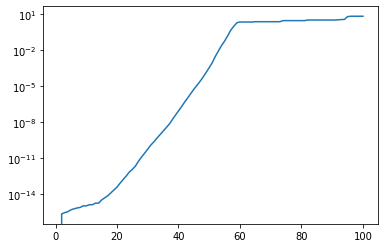

In [11]:
norms = {}
for k in range(1,101):
  Q_kplus1, alpha_k, beta_k = Lanczos_iter(A, x0, k)

  if Q_kplus1.shape==(A.shape[0],k+1):
    Q_k = Q_kplus1[:,:k]
  else:
    Q_k = Q_kplus1

  norms[k] = la.norm(np.dot(Q_k.T, Q_k)-np.identity(Q_k.shape[1]), np.inf)

plt.semilogy(list(norms.keys()), list(norms.values()))
plt.show()

As expected, the Lanczos algorithm performs worse compared to the Arnoldi's one regarding the orthogonalitation of the basis vectors of the Krilov subspace. 
That's why when using Lanczos, usually a reorthogonalition procedure is also applied.